data: <br>
test.benign: 360 <br>
test.malignant: 300 <br>
train.benign: 1440 <br>
train.malignant: 1197 <br>
total.benign: 1800 <br>
total.malignant: 1497 <br>

train b1000 m1000
validation b250 m250
test b247 m247

In [115]:
import os, shutil

In [8]:
path = '../data/big/benign'
for file in os.listdir(path):
    new = 'benign.' + file
    os.rename(os.path.join(path, file), os.path.join(path, new))

In [9]:
path = '../data/big/malignant'
for file in os.listdir(path):
    new = 'malignant.' + file
    os.rename(os.path.join(path, file), os.path.join(path, new))

In [185]:
# The path to the directory where the original
# dataset is uncompressed
original_dataset_dir = '../data/big'

# The directory where to
# store the smaller dataset
base_dir = '../data/idea1'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create the directories for the 
# training partition
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# validation partition
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# test partition
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)
print("test_dir=",test_dir)

train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
test_dir= ../data/idea1\test


In [186]:
# Directory with the training benign pictures
train_benign_dir = os.path.join(train_dir, 'benign')
if not os.path.exists(train_benign_dir):
    os.mkdir(train_benign_dir)

# Directory with the training dog pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')
if not os.path.exists(train_malignant_dir):
    os.mkdir(train_malignant_dir)

# Directory with the validation benign pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
if not os.path.exists(validation_benign_dir):
    os.mkdir(validation_benign_dir)

# Directory with the validation dog pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')
if not os.path.exists(validation_malignant_dir):
    os.mkdir(validation_malignant_dir)

# Directory with the test benign pictures
test_benign_dir = os.path.join(test_dir, 'benign')
if not os.path.exists(test_benign_dir):
    os.mkdir(test_benign_dir)

# Directory with the test dog pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')
if not os.path.exists(test_malignant_dir):
    os.mkdir(test_malignant_dir)

In [19]:
# Copy first 1000 benign images to train_benigns_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_benign_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 250 benign images to validation_benigns_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 250 benign images to test_benign_dir
fnames = ['benign.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 malignant images to train_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    try: 
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_malignant_dir, fname)
        shutil.copyfile(src, dst)
    except:
        pass
    
# Copy next 500 malignant images to validation_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 malignant images to test_malignant_dir
fnames = ['malignant.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_malignant_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 244, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 244),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 244),
        batch_size=20,
        class_mode='binary')

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
%%time
history = model.fit(
            training_generator,
            steps_per_epoch=10,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=25)

Epoch 1/30
10/10 [==============================] - 15s 1s/step - loss: 0.6979 - acc: 0.4900 - val_loss: 0.6884 - val_acc: 0.5360
Epoch 2/30
10/10 [==============================] - 11s 1s/step - loss: 0.6857 - acc: 0.5700 - val_loss: 0.6850 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 10s 1s/step - loss: 0.6902 - acc: 0.5590 - val_loss: 0.6801 - val_acc: 0.5020
Epoch 4/30
10/10 [==============================] - 11s 1s/step - loss: 0.6774 - acc: 0.6300 - val_loss: 0.6776 - val_acc: 0.4980
Epoch 5/30
10/10 [==============================] - 11s 1s/step - loss: 0.6801 - acc: 0.6100 - val_loss: 0.6761 - val_acc: 0.5000
Epoch 6/30
10/10 [==============================] - 11s 1s/step - loss: 0.6742 - acc: 0.6050 - val_loss: 0.6666 - val_acc: 0.7640
Epoch 7/30
10/10 [==============================] - 11s 1s/step - loss: 0.6585 - acc: 0.6350 - val_loss: 0.6601 - val_acc: 0.5460
Epoch 8/30
10/10 [==============================] - 11s 1s/step - loss: 0.6631 - acc: 0.66

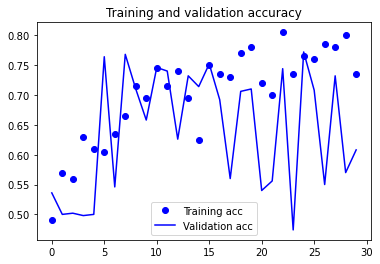

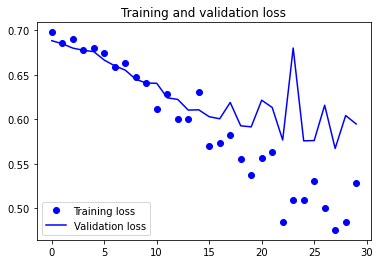

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [46]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=16,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/16
30/30 [==============================] - 21s 666ms/step - loss: 0.6905 - acc: 0.5150 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 2/16
30/30 [==============================] - 20s 664ms/step - loss: 0.6846 - acc: 0.5664 - val_loss: 0.6811 - val_acc: 0.4980
Epoch 3/16
30/30 [==============================] - 20s 661ms/step - loss: 0.6747 - acc: 0.6151 - val_loss: 0.6676 - val_acc: 0.6480
Epoch 4/16
30/30 [==============================] - 20s 667ms/step - loss: 0.6518 - acc: 0.6667 - val_loss: 0.6480 - val_acc: 0.7260
Epoch 5/16
30/30 [==============================] - 20s 663ms/step - loss: 0.6364 - acc: 0.7059 - val_loss: 0.6343 - val_acc: 0.7700
Epoch 6/16
30/30 [==============================] - 21s 697ms/step - loss: 0.6008 - acc: 0.7450 - val_loss: 0.6272 - val_acc: 0.5700
Epoch 7/16
30/30 [=============================

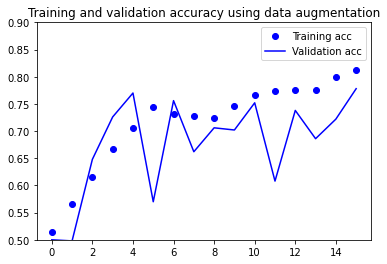

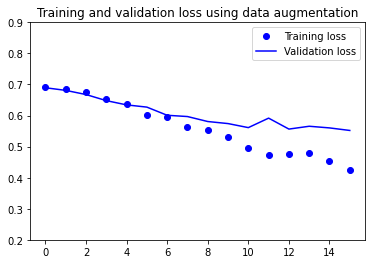

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [48]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 500 images belonging to 2 classes.


<ipython-input-48-b5d03b3a6ef0>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.777999997138977
test loss: 0.5325449705123901


In [44]:
import numpy as np
np.argmin(history.history["val_loss"])

16

In [23]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [24]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 760ms/step - loss: 0.6426 - acc: 0.6133 - val_loss: 0.6729 - val_acc: 0.5220
Epoch 2/30
30/30 [==============================] - 24s 785ms/step - loss: 0.5911 - acc: 0.6941 - val_loss: 0.7839 - val_acc: 0.4920
Epoch 3/30
30/30 [==============================] - 22s 734ms/step - loss: 0.4630 - acc: 0.7916 - val_loss: 0.7092 - val_acc: 0.6840
Epoch 4/30
30/30 [==============================] - 22s 732ms/step - loss: 0.4870 - acc: 0.8000 - val_loss: 0.5778 - val_acc: 0.6740
Epoch 5/30
30/30 [==============================] - 22s 732ms/step - loss: 0.4446 - acc: 0.7733 - val_loss: 0.5294 - val_acc: 0.7340
Epoch 6/30
30/30 [==============================] - 23s 773ms/step - loss: 0.4928 - acc: 0.7717 - val_loss: 0.5240 - val_acc: 0.7340
Epoch 7/30
30/30 [=============================

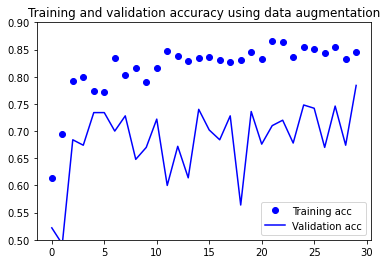

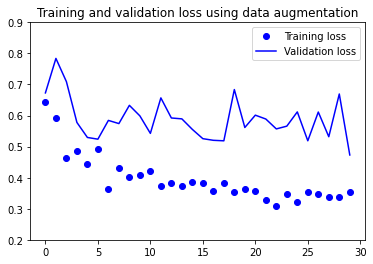

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [28]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [29]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 778ms/step - loss: 1.7344 - acc: 0.5350 - val_loss: 0.6852 - val_acc: 0.7120
Epoch 2/30
30/30 [==============================] - 23s 759ms/step - loss: 0.6884 - acc: 0.5650 - val_loss: 0.6781 - val_acc: 0.5160
Epoch 3/30
30/30 [==============================] - 24s 796ms/step - loss: 0.7876 - acc: 0.5500 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 23s 768ms/step - loss: 0.7401 - acc: 0.5479 - val_loss: 0.6909 - val_acc: 0.5240
Epoch 5/30
30/30 [==============================] - 23s 774ms/step - loss: 0.6687 - acc: 0.6050 - val_loss: 0.9982 - val_acc: 0.5020
Epoch 6/30
30/30 [==============================] - 22s 741ms/step - loss: 0.6464 - acc: 0.6571 - val_loss: 0.6665 - val_acc: 0.7000
Epoch 7/30
30/30 [=============================

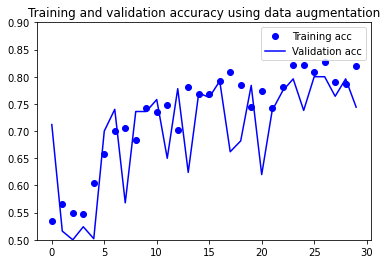

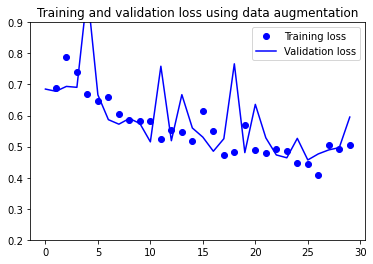

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [31]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [32]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 787ms/step - loss: 1.0493 - acc: 0.5500 - val_loss: 0.6085 - val_acc: 0.7800
Epoch 2/30
30/30 [==============================] - 23s 768ms/step - loss: 0.7468 - acc: 0.6500 - val_loss: 0.5642 - val_acc: 0.7280
Epoch 3/30
30/30 [==============================] - 23s 768ms/step - loss: 0.7143 - acc: 0.5700 - val_loss: 0.6341 - val_acc: 0.5420
Epoch 4/30
30/30 [==============================] - 23s 755ms/step - loss: 0.6609 - acc: 0.6733 - val_loss: 0.7609 - val_acc: 0.5400
Epoch 5/30
30/30 [==============================] - 23s 757ms/step - loss: 0.6627 - acc: 0.6483 - val_loss: 0.5744 - val_acc: 0.7620
Epoch 6/30
30/30 [==============================] - 23s 776ms/step - loss: 0.5365 - acc: 0.7667 - val_loss: 0.8474 - val_acc: 0.5360
Epoch 7/30
30/30 [=============================

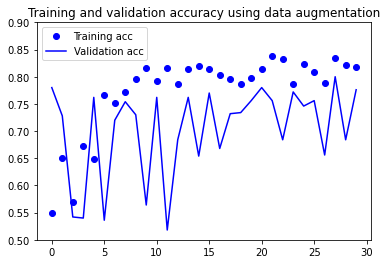

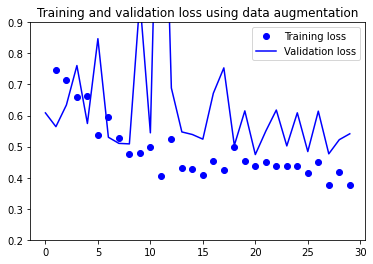

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [34]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.65)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [35]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 23s 733ms/step - loss: 1.1093 - acc: 0.5217 - val_loss: 0.7096 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 22s 732ms/step - loss: 0.6935 - acc: 0.5513 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 22s 725ms/step - loss: 0.7434 - acc: 0.5900 - val_loss: 0.7395 - val_acc: 0.5000
Epoch 4/30
30/30 [==============================] - 24s 813ms/step - loss: 0.6602 - acc: 0.6283 - val_loss: 0.5803 - val_acc: 0.7400
Epoch 5/30
30/30 [==============================] - 24s 780ms/step - loss: 0.7036 - acc: 0.6750 - val_loss: 0.6167 - val_acc: 0.7060
Epoch 6/30
30/30 [==============================] - 22s 729ms/step - loss: 0.6366 - acc: 0.6600 - val_loss: 0.6778 - val_acc: 0.5280
Epoch 7/30
30/30 [=============================

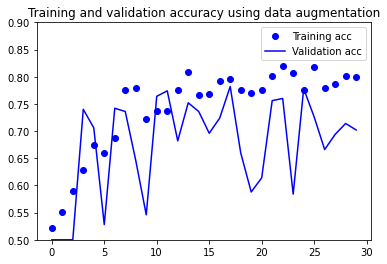

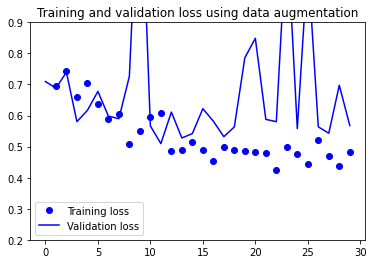

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [37]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [38]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 31s 989ms/step - loss: 0.6845 - acc: 0.5714 - val_loss: 0.6812 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 28s 943ms/step - loss: 0.5982 - acc: 0.6840 - val_loss: 0.6500 - val_acc: 0.4860
Epoch 3/30
30/30 [==============================] - 28s 941ms/step - loss: 0.5638 - acc: 0.7277 - val_loss: 0.6033 - val_acc: 0.6440
Epoch 4/30
30/30 [==============================] - 28s 937ms/step - loss: 0.5275 - acc: 0.7328 - val_loss: 0.7398 - val_acc: 0.4680
Epoch 5/30
30/30 [==============================] - 28s 944ms/step - loss: 0.5305 - acc: 0.7233 - val_loss: 0.7729 - val_acc: 0.4740
Epoch 6/30
30/30 [==============================] - 30s 984ms/step - loss: 0.4963 - acc: 0.7350 - val_loss: 0.5895 - val_acc: 0.7520
Epoch 7/30
30/30 [=============================

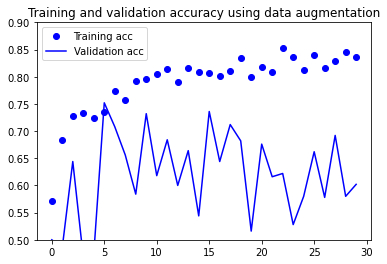

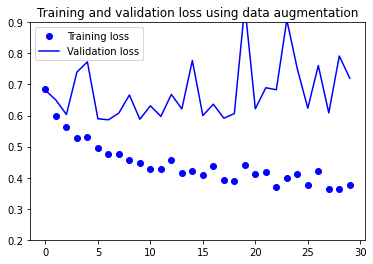

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [40]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [41]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 29s 928ms/step - loss: 0.7462 - acc: 0.5433 - val_loss: 0.6353 - val_acc: 0.7800
Epoch 2/30
30/30 [==============================] - 28s 927ms/step - loss: 0.5942 - acc: 0.6917 - val_loss: 0.6621 - val_acc: 0.5200
Epoch 3/30
30/30 [==============================] - 28s 927ms/step - loss: 0.5332 - acc: 0.7350 - val_loss: 0.6330 - val_acc: 0.6720
Epoch 4/30
30/30 [==============================] - 28s 945ms/step - loss: 0.4448 - acc: 0.7983 - val_loss: 0.8113 - val_acc: 0.5540
Epoch 5/30
30/30 [==============================] - 28s 926ms/step - loss: 0.4411 - acc: 0.8033 - val_loss: 0.5766 - val_acc: 0.7140
Epoch 6/30
30/30 [==============================] - 28s 925ms/step - loss: 0.4128 - acc: 0.8185 - val_loss: 0.6107 - val_acc: 0.6680
Epoch 7/30
30/30 [=============================

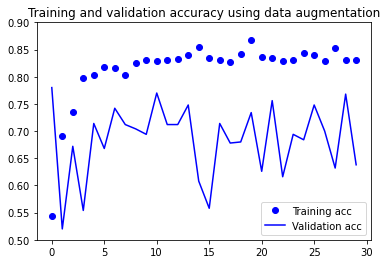

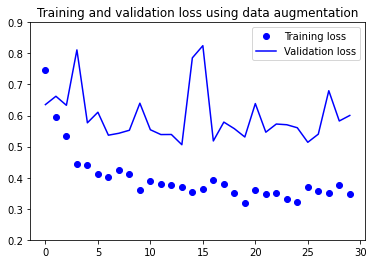

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [43]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['acc'])

In [44]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 29s 953ms/step - loss: 5.4026 - acc: 0.5092 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 29s 961ms/step - loss: 0.8571 - acc: 0.5059 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 3/30
30/30 [==============================] - 28s 933ms/step - loss: 1.9454 - acc: 0.5783 - val_loss: 0.6508 - val_acc: 0.7600
Epoch 4/30
30/30 [==============================] - 28s 934ms/step - loss: 0.8378 - acc: 0.6117 - val_loss: 0.6822 - val_acc: 0.5000
Epoch 5/30
30/30 [==============================] - 28s 927ms/step - loss: 0.6795 - acc: 0.6383 - val_loss: 1.1128 - val_acc: 0.5000
Epoch 6/30
30/30 [==============================] - 28s 926ms/step - loss: 0.7750 - acc: 0.6454 - val_loss: 0.7745 - val_acc: 0.5140
Epoch 7/30
30/30 [=============================

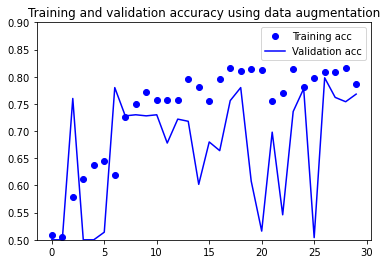

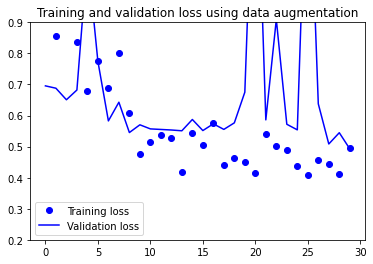

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [5]:
from keras.callbacks import ReduceLROnPlateau
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [11]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Wall time: 169 ms


In [12]:
%%time
from keras.applications.resnet import ResNet50
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


input_shape = (224,224,3)
lr = 1e-5
epochs = 50
batch_size = 64

model = ResNet50(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='avg',
                 classes=2)

model.compile(optimizer = optimizers.RMSprop(learning_rate=lr),
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

history = model.fit(train_generator, validation_data=validation_generator,
                    epochs= epochs, batch_size= batch_size, verbose=1, 
                    callbacks=[learning_rate_reduction])

Epoch 1/50


ValueError: in user code:

    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "D:\Uni\DIS06\anaconda3\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [17]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [18]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 46s 1s/step - loss: 0.7176 - acc: 0.5429 - val_loss: 0.6584 - val_acc: 0.7160
Epoch 2/30
30/30 [==============================] - 32s 1s/step - loss: 0.6135 - acc: 0.6605 - val_loss: 0.6402 - val_acc: 0.7100
Epoch 3/30
30/30 [==============================] - 31s 1s/step - loss: 0.5995 - acc: 0.6683 - val_loss: 0.6146 - val_acc: 0.7460
Epoch 4/30
30/30 [==============================] - 31s 1s/step - loss: 0.5357 - acc: 0.7300 - val_loss: 0.6078 - val_acc: 0.6500
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 0.5299 - acc: 0.7250 - val_loss: 0.6011 - val_acc: 0.6660
Epoch 6/30
30/30 [==============================] - 31s 1s/step - loss: 0.5058 - acc: 0.7550 - val_loss: 0.7655 - val_acc: 0.4940
Epoch 7/30
30/30 [==============================] - 30s 1s/step -

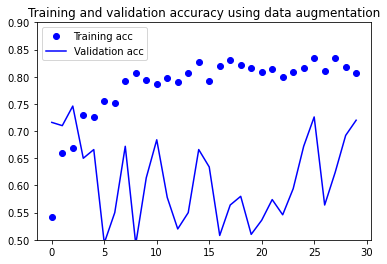

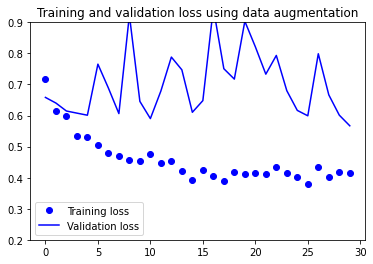

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [28]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [29]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=15,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/15
30/30 [==============================] - 33s 1s/step - loss: 0.6437 - acc: 0.6367 - val_loss: 0.6152 - val_acc: 0.6520
Epoch 2/15
30/30 [==============================] - 31s 1s/step - loss: 0.5989 - acc: 0.6917 - val_loss: 0.6181 - val_acc: 0.5660
Epoch 3/15
30/30 [==============================] - 28s 942ms/step - loss: 0.5317 - acc: 0.7367 - val_loss: 0.6664 - val_acc: 0.5060
Epoch 4/15
30/30 [==============================] - 28s 945ms/step - loss: 0.5367 - acc: 0.7417 - val_loss: 0.5860 - val_acc: 0.7620
Epoch 5/15
30/30 [==============================] - 29s 961ms/step - loss: 0.5065 - acc: 0.7333 - val_loss: 0.5932 - val_acc: 0.6760
Epoch 6/15
30/30 [==============================] - 29s 952ms/step - loss: 0.5042 - acc: 0.7429 - val_loss: 0.5948 - val_acc: 0.6700
Epoch 7/15
30/30 [==============================] - 2

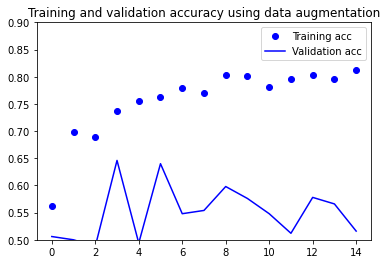

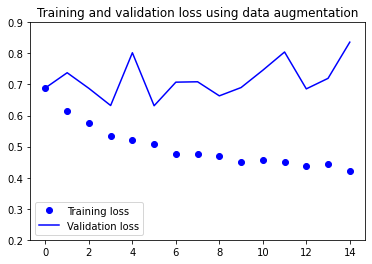

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

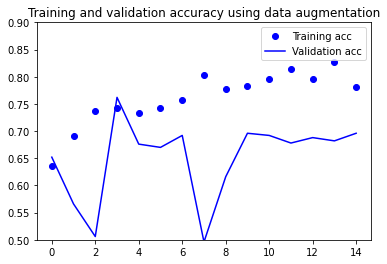

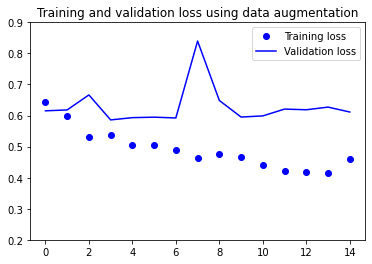

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

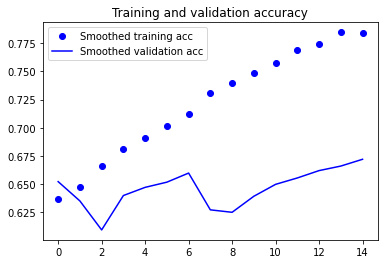

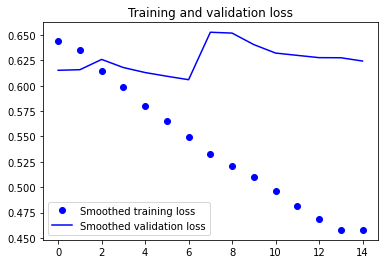

In [31]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [33]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=15,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/15
30/30 [==============================] - 43s 1s/step - loss: 0.6982 - acc: 0.5933 - val_loss: 0.6452 - val_acc: 0.7560
Epoch 2/15
30/30 [==============================] - 42s 1s/step - loss: 0.6190 - acc: 0.6622 - val_loss: 0.6348 - val_acc: 0.5080
Epoch 3/15
30/30 [==============================] - 44s 1s/step - loss: 0.5644 - acc: 0.7183 - val_loss: 0.6564 - val_acc: 0.5040
Epoch 4/15
30/30 [==============================] - 44s 1s/step - loss: 0.5443 - acc: 0.7217 - val_loss: 0.6795 - val_acc: 0.5180
Epoch 5/15
30/30 [==============================] - 43s 1s/step - loss: 0.4945 - acc: 0.7550 - val_loss: 0.7484 - val_acc: 0.5080
Epoch 6/15
30/30 [==============================] - 43s 1s/step - loss: 0.4734 - acc: 0.7815 - val_loss: 0.6275 - val_acc: 0.6320
Epoch 7/15
30/30 [==============================] - 43s 1s/step -

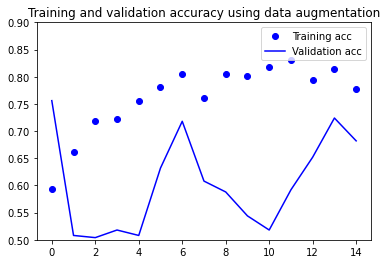

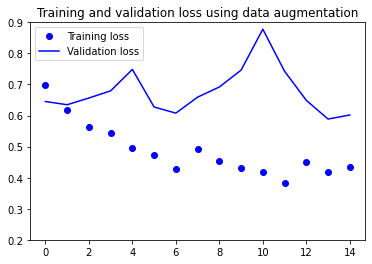

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [6]:
import pickle
class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

In [1]:
from tensorflow.keras import models

In [119]:
model = models.load_model('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_data_augmentation_epochs_30_try_4.h5')

In [120]:
file = open('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_data_augmentation_epochs_30_try_4_History','rb')
history = pickle.load(file)

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 500 images belonging to 2 classes.


<ipython-input-126-aa8ff8734cd0>:12: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)


test acc: 0.6959999799728394
test loss: 0.5638328790664673


In [76]:
import numpy as np
np.argmin(history.history["val_loss"])

25

In [77]:
import numpy as np
np.argmax(history.history["val_acc"])

25

In [79]:
history.history["val_acc"][25]

0.8259999752044678

In [124]:
history.history["val_acc"][29]

0.7279999852180481

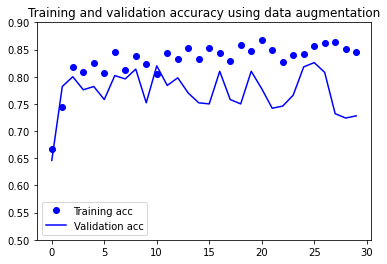

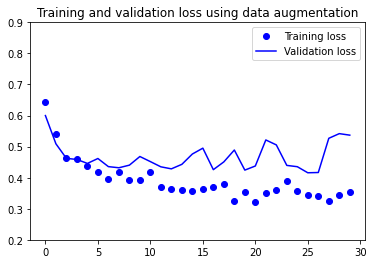

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [127]:
model = models.load_model('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_data_augmentation_epochs_50_try_1.h5')

In [128]:
file = open('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_data_augmentation_epochs_50_try_1_History','rb')
history = pickle.load(file)

In [131]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 33s 1s/step - loss: 0.5168 - acc: 0.7460
test acc: 0.7459999918937683
test loss: 0.516769528388977


In [82]:
import numpy as np
np.argmin(history.history["val_loss"])

20

In [83]:
import numpy as np
np.argmax(history.history["val_acc"])

20

In [84]:
history.history["val_acc"][20]

0.8320000171661377

In [130]:
history.history["val_acc"][49]

0.7379999756813049

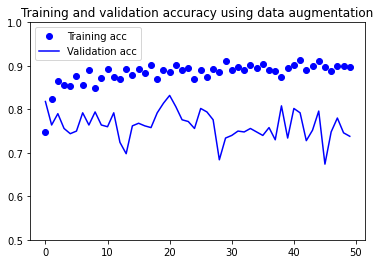

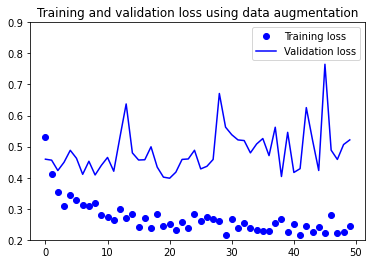

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,1.0))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [132]:
model = models.load_model('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_data_augmentation_epochs_100_try_1.h5')

In [133]:
file = open('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_data_augmentation_epochs_100_try_1_History','rb')
history = pickle.load(file)

In [134]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 33s 1s/step - loss: 0.7084 - acc: 0.7160
test acc: 0.7160000205039978
test loss: 0.708430290222168


In [135]:
import numpy as np
np.argmin(history.history["val_loss"])

12

In [136]:
import numpy as np
np.argmax(history.history["val_acc"])

12

In [137]:
history.history["val_acc"][12]

0.8140000104904175

In [138]:
history.history["val_acc"][99]

0.7319999933242798

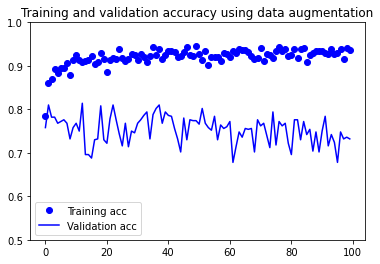

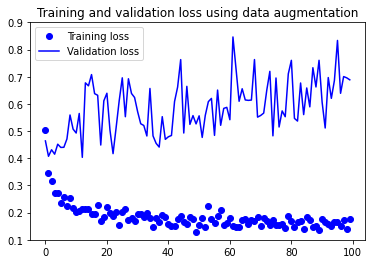

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,1.0))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.1,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [139]:
model = models.load_model('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_fine_tuning_30_epochs_try_4.h5')

In [140]:
file = open('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_fine_tuning_30_epochs_try_4_History','rb')
history = pickle.load(file)

In [141]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 34s 1s/step - loss: 0.5013 - acc: 0.7600
test acc: 0.7599999904632568
test loss: 0.5012695789337158


In [142]:
import numpy as np
np.argmin(history.history["val_loss"])

11

In [143]:
import numpy as np
np.argmax(history.history["val_acc"])

15

In [144]:
history.history["val_acc"][11]

0.8140000104904175

In [145]:
history.history["val_acc"][15]

0.8399999737739563

In [146]:
history.history["val_acc"][29]

0.7720000147819519

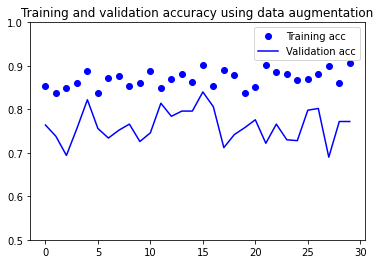

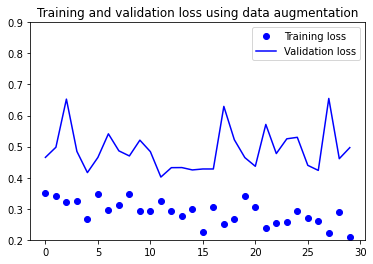

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,1.0))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [147]:
model = models.load_model('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_fine_tuning_50_epochs_try_1.h5')

In [148]:
file = open('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_fine_tuning_50_epochs_try_1_History','rb')
history = pickle.load(file)

In [149]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 33s 1s/step - loss: 0.5313 - acc: 0.7460
test acc: 0.7459999918937683
test loss: 0.5313171744346619


In [150]:
import numpy as np
np.argmin(history.history["val_loss"])

28

In [151]:
import numpy as np
np.argmax(history.history["val_acc"])

14

In [152]:
history.history["val_acc"][28]

0.8100000023841858

In [153]:
history.history["val_acc"][14]

0.8240000009536743

In [154]:
history.history["val_acc"][49]

0.7699999809265137

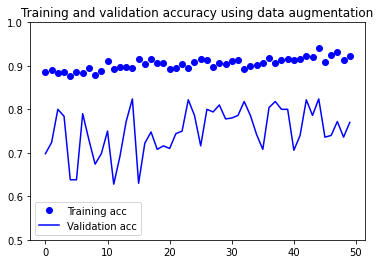

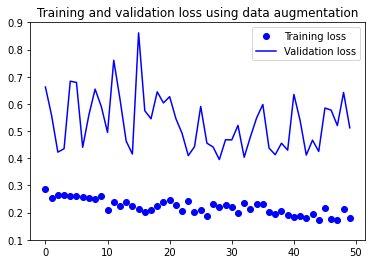

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,1.0))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.1,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [155]:
model = models.load_model('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_fine_tuning_100_epochs_try_1.h5')

In [156]:
file = open('BenignMalignantClass_pretrained_CNN_FeatExtraction_using_fine_tuning_100_epochs_try_1_History','rb')
history = pickle.load(file)

In [157]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 34s 1s/step - loss: 0.8505 - acc: 0.7160
test acc: 0.7160000205039978
test loss: 0.8505057692527771


In [158]:
import numpy as np
np.argmin(history.history["val_loss"])

5

In [159]:
import numpy as np
np.argmax(history.history["val_acc"])

47

In [160]:
history.history["val_acc"][5]

0.800000011920929

In [161]:
history.history["val_acc"][47]

0.828000009059906

In [162]:
history.history["val_acc"][99]

0.7080000042915344

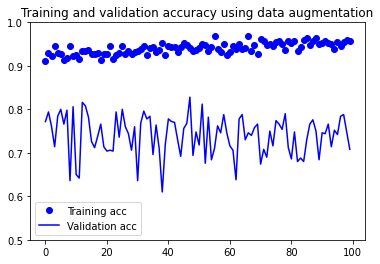

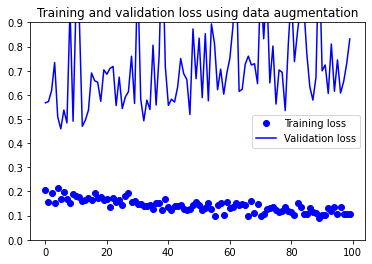

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,1.0))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0,0.9))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Beste ergebnisse mit Part 2 des 9er notebook. Jetzt tunen
Wenig epochen beim testen, 

In [176]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [177]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [178]:
conv_base.trainable = False

In [179]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note again, that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=33,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 76s 2s/step - loss: 0.5959 - acc: 0.7015 - val_loss: 0.5571 - val_acc: 0.7220
Epoch 2/10
33/33 [==============================] - 78s 2s/step - loss: 0.5341 - acc: 0.7682 - val_loss: 0.5071 - val_acc: 0.7480
Epoch 3/10
33/33 [==============================] - 78s 2s/step - loss: 0.4788 - acc: 0.7788 - val_loss: 0.4845 - val_acc: 0.7600
Epoch 4/10
33/33 [==============================] - 75s 2s/step - loss: 0.4375 - acc: 0.8091 - val_loss: 0.4599 - val_acc: 0.7760
Epoch 5/10
33/33 [==============================] - 76s 2s/step - loss: 0.4550 - acc: 0.8061 - val_loss: 0.4675 - val_acc: 0.7740
Epoch 6/10
33/33 [==============================] - 76s 2s/step - loss: 0.4177 - acc: 0.8244 - val_loss: 0.4426 - val_acc: 0.7980
Epoch 7/10
33/33 [==============================] - 75s 2s/step - loss: 0.4244 - acc: 0.8242 - val_loss: 0.4455 - val_acc: 0.7860
Epoch 8

In [189]:
test_plan = {}
test_plan[0] = {"n_units": 256, "learning_rate": 2e-5, "batch_size": 20}
test_plan[1] = {"n_units": 128, "learning_rate": 2e-5, "batch_size": 20}
test_plan[2] = {"n_units": 512, "learning_rate": 2e-5, "batch_size": 20}
test_plan[3] = {"n_units": 256, "learning_rate": 2e-4, "batch_size": 20}
test_plan[4] = {"n_units": 256, "learning_rate": 2e-3, "batch_size": 20}
test_plan[5] = {"n_units": 256, "learning_rate": 2e-5, "batch_size": 40}
test_plan[6] = {"n_units": 256, "learning_rate": 2e-5, "batch_size": 60}


In [190]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

result_dict = {}

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)


for n in range(len(test_plan)):
    n_units = test_plan[n]["n_units"]
    learning_rate = test_plan[n]["learning_rate"]
    batch_size = test_plan[n]["batch_size"]

    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(n_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    conv_base.trainable = False

    train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

    # Note again, that the validation data should not be augmented!
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='binary')

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=learning_rate),
                  metrics=['acc'])

    history = model.fit(
          train_generator,
          steps_per_epoch=2000/batch_size,
          epochs=10,
          validation_data=validation_generator,
          validation_steps=500/batch_size,
          verbose=1)
    
    
    result_dict[n] = {"n_units": n_units,  
                 "learning rate": learning_rate, 
                 "batch size": batch_size, 
                 "val_accuracy": history.history['val_acc'][-1]}

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 182s 2s/step - loss: 0.5384 - acc: 0.7378 - val_loss: 0.4584 - val_acc: 0.7900
Epoch 2/10
100/100 [==============================] - 203s 2s/step - loss: 0.4435 - acc: 0.8060 - val_loss: 0.4422 - val_acc: 0.8040
Epoch 3/10
100/100 [==============================] - 183s 2s/step - loss: 0.3997 - acc: 0.8326 - val_loss: 0.4854 - val_acc: 0.7480
Epoch 4/10
100/100 [==============================] - 187s 2s/step - loss: 0.3754 - acc: 0.8471 - val_loss: 0.4904 - val_acc: 0.7460
Epoch 5/10
100/100 [==============================] - 187s 2s/step - loss: 0.3607 - acc: 0.8421 - val_loss: 0.4527 - val_acc: 0.7680
Epoch 6/10
100/100 [==============================] - 188s 2s/step - loss: 0.3511 - acc: 0.8486 - val_loss: 0.4452 - val_acc: 0.7820
Epoch 7/10
100/100 [==============================] - 188s 2s/step - loss: 0.3416 - acc: 0.8521 - val_loss: 0.4374 - va

Epoch 9/10
50/50 [==============================] - 155s 3s/step - loss: 0.3432 - acc: 0.8536 - val_loss: 0.4255 - val_acc: 0.8040
Epoch 10/10
50/50 [==============================] - 155s 3s/step - loss: 0.3451 - acc: 0.8461 - val_loss: 0.4655 - val_acc: 0.7520
Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 197s 6s/step - loss: 0.5801 - acc: 0.7008 - val_loss: 0.5006 - val_acc: 0.7840
Epoch 2/10
33/33 [==============================] - 197s 6s/step - loss: 0.4682 - acc: 0.8085 - val_loss: 0.5458 - val_acc: 0.6960
Epoch 3/10
33/33 [==============================] - 196s 6s/step - loss: 0.4385 - acc: 0.8080 - val_loss: 0.4466 - val_acc: 0.7740
Epoch 4/10
33/33 [==============================] - 197s 6s/step - loss: 0.4052 - acc: 0.8296 - val_loss: 0.4366 - val_acc: 0.7940
Epoch 5/10
33/33 [==============================] - 199s 6s/step - loss: 0.3945 - acc: 0.8286 - val_loss: 0.4421 - val_acc: 0.7720

In [193]:
import pandas as pd
pd.DataFrame.from_dict(result_dict, orient = "index")

,n_units,learning rate,batch size,val_accuracy
0,256,0.00002,20,0.792
1,128,0.00002,20,0.760
2,512,0.00002,20,0.764
3,256,0.00020,20,0.724
4,256,0.00200,20,0.720
5,256,0.00002,40,0.752
6,256,0.00002,60,0.828


In [194]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 39s 2s/step - loss: 0.4628 - acc: 0.8040
test acc: 0.8040000200271606
test loss: 0.4628366231918335


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

In [195]:
model.save('CNNbtach60.h5')

In [196]:
with open('CNNbtach60_History', 'wb') as file:
    model_history= History_trained_model(history.history, history.epoch, history.params)
    pickle.dump(model_history, file, pickle.HIGHEST_PROTOCOL) 

Obwohl verschiedene Möglichkeiten genutzt wurden, ist Overfitting immernoch ein problem-> lowere learning Rate, dropout und weight regularization testen
Über den Verlauf der Epochen waren mehr Units in der Dense layer besser und eine größere Batch size hat ebenfalls gute ergebnisse gebracht
Durch starke schwankungen werden model checkpoints genutzt. Nur das Model mit der höchsten val_acc wird gespeichert.
Nach tests mit lowerer learning Rate, dropout und weight regu wird bestes modell genommen und gefinetuned
Generell kann man sagen,je höher der weight decay desto weniger wahrscheinlich sollte das modell overfitten


In [199]:
# test_plan2 = {}
# test_plan2[0] = {"learning rate": 1e-5, "dropout": 0, "weight regularization": 0}
# test_plan2[1] = {"learning rate": 1e-6, "dropout": 0, "weight regularization": 0}
# test_plan2[2] = {"learning rate": 1e-7, "dropout": 0, "weight regularization": 0}
# test_plan2[3] = {"learning rate": 2e-5, "dropout": 0.4, "weight regularization": 0}
# test_plan2[4] = {"learning rate": 2e-5, "dropout": 0.6, "weight regularization": 0}
# test_plan2[5] = {"learning rate": 2e-5, "dropout": 0, "weight regularization": 1e-3}
# test_plan2[6] = {"learning rate": 2e-5, "dropout": 0, "weight regularization": 1e-2}
# test_plan2[7] = {"learning rate": 2e-5, "dropout": 0, "weight regularization": 1e-1}



In [210]:
test_plan2 = {}
test_plan2[0] = {"learning_rate": 2e-5, "dropout": 0.4, "weight regularization": 0}
test_plan2[1] = {"learning_rate": 2e-5, "dropout": 0.6, "weight regularization": 0}



In [211]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers


result_dict2 = {}

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)


for n in range(len(test_plan2)):
    learning_rate = test_plan2[n]["learning_rate"]
    dropout = test_plan2[n]["dropout"]
    weights = test_plan2[n]["weight regularization"]

    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    
    if weights == 0:
        model.add(layers.Dense(256, activation='relu'))
    else:
        model.add(layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l1_l2(l1=weights, l2=weights)))
                  
    if dropout == 0:
        pass
    else:
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    conv_base.trainable = False

    train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

    # Note again, that the validation data should not be augmented!
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(224, 224),
            batch_size=60,
            class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(224, 224),
            batch_size=60,
            class_mode='binary')

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=learning_rate),
                  metrics=['acc'])
    
    mc = ModelCheckpoint('best_model' + str(n) + '.h5', monitor='val_acc', mode='max', verbose=1)

    history = model.fit(
          train_generator,
          steps_per_epoch=33,
          epochs=10,
          validation_data=validation_generator,
          validation_steps=8,
          verbose=1, callbacks=[mc])
    
    
    result_dict2[n] = {"learning rate": learning_rate,  
                 "dropout": dropout, 
                 "weight regularization": weights, 
                 "val_accuracy": history.history['val_acc'][-1]}

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 0.6209 - acc: 0.6646
Epoch 1: saving model to best_model0.h5
33/33 [==============================] - 186s 6s/step - loss: 0.6209 - acc: 0.6646 - val_loss: 0.5217 - val_acc: 0.7417
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 0.5075 - acc: 0.7628
Epoch 2: saving model to best_model0.h5
33/33 [==============================] - 196s 6s/step - loss: 0.5075 - acc: 0.7628 - val_loss: 0.4724 - val_acc: 0.7917
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 0.4598 - acc: 0.7964
Epoch 3: saving model to best_model0.h5
33/33 [==============================] - 197s 6s/step - loss: 0.4598 - acc: 0.7964 - val_loss: 0.4439 - val_acc: 0.7854
Epoch 4/10
33/33 [==============================] - ETA: 0s - loss: 0.4300 - acc: 0.8165
Epoch 4: saving model to best_model0.h5
33/33 [==============================] - 

In [ ]:
import pandas as pd
pd.DataFrame.from_dict(result_dict2, orient = "index")